In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
import time
from IPython.display import HTML

def random_walk(
                L: int=101, 
                N: int=10000, 
                manhattan: bool=False
               ):
    '''
    Performs a random walk with N steps on a grid of size L x L, according to move probabilities given by the list 'probs'. Creates a 2D plot and gif of the random walk.
    
    Args:
        L (int): grid size - default 101
        N (int): number of steps in random walk - default 10000
        manhattan (bool): if True, only accept left or right move with 1/3 probability - default False

    Return:
        dict: Dictionary containing computation time, gif creation time, and plot creation time.
    '''
    
    # create two arrays to hold x and y coordinates
    # size equal to the number of steps
    x = np.zeros(N, dtype=int)
    y = np.zeros(N, dtype=int)
    
    # start posit at center of grid
    x[0] = L // 2
    y[0] = L // 2
    
    directions = np.array([
        [1, 0],   # one step right
        [-1, 0],  # one step left
        [0, 1],   # one step up
        [0, -1]   # one step down
    ])
    
    # Perform the random walk
    start = time.time()
    for i in range(1, N):
        # choose number from 0 to 3 corresponding to left, right, up, down moves, respectively
        dx, dy = directions[np.random.choice(len(directions))]
        # if walking in Manhattan, only accept left right moves with probability 1/3
        if manhattan:
            if (dx, dy) in [(-1, 0), (1, 0)]:  # left or right
                if np.random.rand() > 1/3:
                    # reject the move and do nothing
                    dx, dy = 0, 0  

        # update:
        # add dx dy to the previous values
        # if 0 is the max between the new value and 0, the move went outside the boundary, so take 0 as the coordinate
        # if L-1 is the minimum between the new value and L-1, the move went outside the boundary, so take L-1 as the coordinate
        x[i] = min(max(x[i - 1] + dx, 0), L - 1)
        y[i] = min(max(y[i - 1] + dy, 0), L - 1)
    end = time.time()
    computation_time = end - start
    
    # # report computation time
    # print(f'Time to run {N} steps of a random walk (Manhattan: {manhattan})')
    # print(f'{end-start:.4e} seconds')
    
    #####################################################################################################################################
    #### ANIMATION ####
    #####################################################################################################################################
    # Set up the figure, axis, and plot elements
    start = time.time()
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    if manhattan:
        ax.set_title(f"Random Walk in Manhattan on {L}x{L} Grid ($N = {N}$ steps)")
    
    else:
        ax.set_title(f"Random Walk on {L}x{L} Grid ($N = {N}$ steps)")
    point, = ax.plot([], [], 'bo', markersize=5)  # The walker is represented by a single blue point
    path, = ax.plot([], [], 'b-', lw=0.5)  # The path is represented by a blue line
    
    # Initialize the point and path position
    def init():
        point.set_data([x[0]], [y[0]])
        path.set_data([], [])  # Start with an empty path
        return point, path
    
    # Update function for each frame
    def animate(i):
        point.set_data([x[i]], [y[i]])  # Update point position
        path.set_data(x[:i+1], y[:i+1])  # Update path to include all points up to current
        return point, path
    
    # Create the animation
    ani = animation.FuncAnimation(fig, animate, init_func=init, frames=N, interval=100, blit=True)
    
    # Save as a gif
    writergif = animation.PillowWriter(fps=30)
    if manhattan:
        ani.save(f'rw_{N}_man.gif', writer=writergif)
    else:
        ani.save(f'rw_{N}.gif', writer=writergif)
    
    plt.show()
    plt.close(fig)
    
    end = time.time()
    gif_creation_time = end - start
    
    #####################################################################################################################################
    #### PLOT ####
    #####################################################################################################################################
    # Plotting the random walk
    start = time.time()
    plt.figure(figsize=(10, 10))
    if manhattan:
        plt.title(f"Random Walk in Manhattan on {L}x{L} Grid ($N = {N}$ steps)")
    
    else:
        plt.title(f"Random Walk on {L}x{L} Grid ($N = {N}$ steps)")
    plt.plot(x, y, lw=0.4)
    plt.plot(x[0], y[0], color='red', marker='*', ms=10, label='start')
    plt.plot(x[-1], y[-1], color='yellow', marker='o', ms=10, label='finish')
    plt.xlim(0, L - 1)
    plt.ylim(0, L - 1)
    # plt.grid(True)
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.legend(loc='upper right')
    if manhattan:
        plt.savefig(f'rw_{N}_man.png')
    else:
        plt.savefig(f'rw_{N}.png')
    plt.show()
    plt.close()

    end = time.time()
    plot_creation_time = end - start

    # Clear large arrays and force garbage collection
    del x, y, directions, ani
    import gc
    gc.collect()

    return {
        "N": N,
        "Manhattan": manhattan,
        "Computation Time (s)": computation_time,
        "GIF Creation Time (s)": gif_creation_time,
        "Plot Creation Time (s)": plot_creation_time
    }

def run_experiments(N_values=[100, 1000, 10000, 100000, 1000000]):
    # Data structure to collect results
    results = []
    
    # Run for each N in N_values for both Manhattan and non-Manhattan
    for N in N_values:
        for manhattan in [False, True]:
            result = random_walk(N=N, manhattan=manhattan)
            results.append(result)
    
    # Convert results to a DataFrame for easy display
    df = pd.DataFrame(results)
    return df

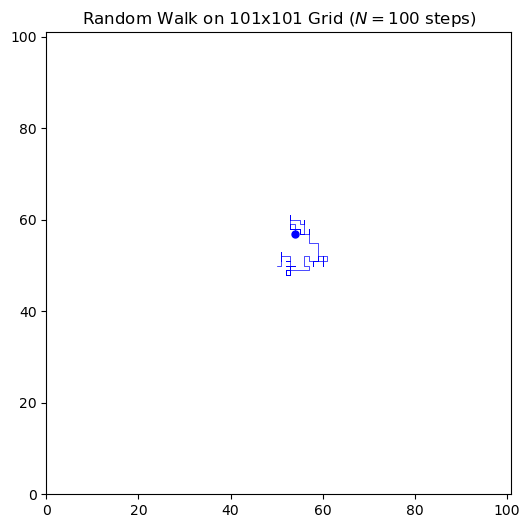

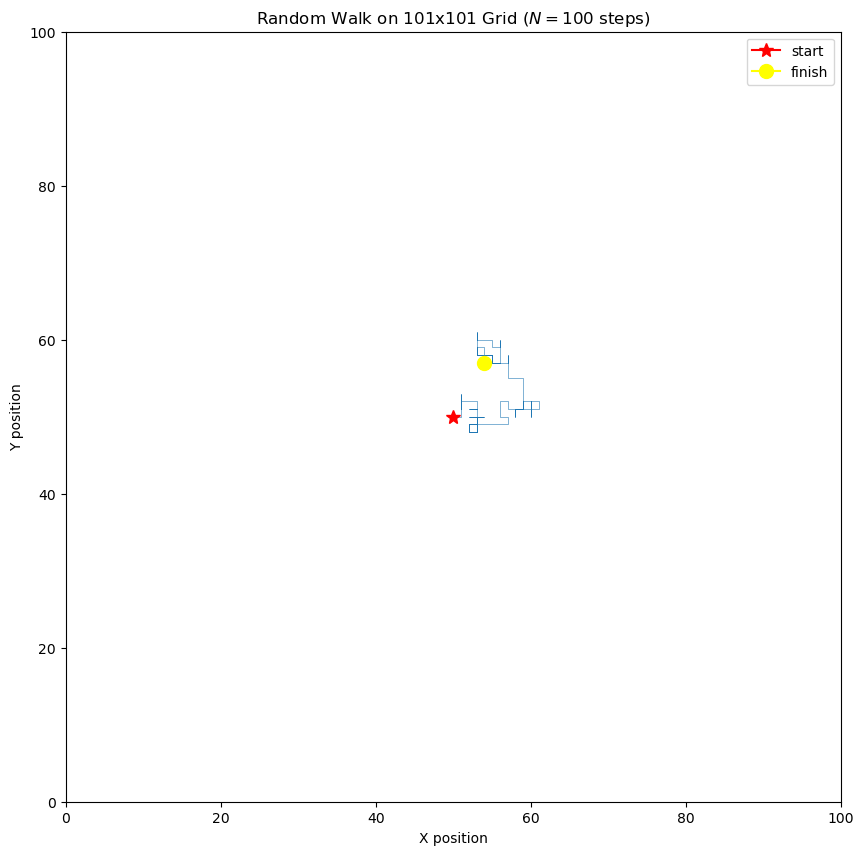

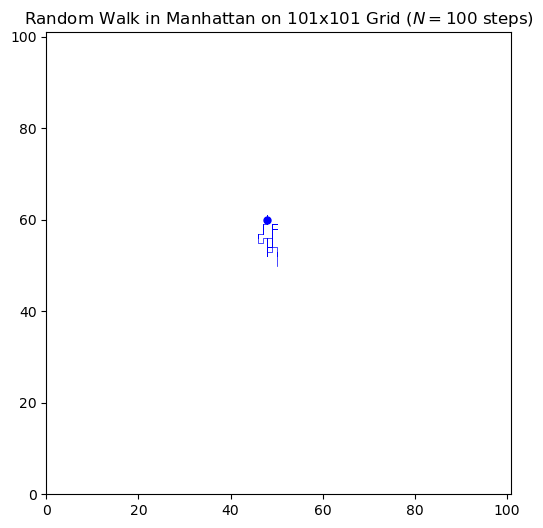

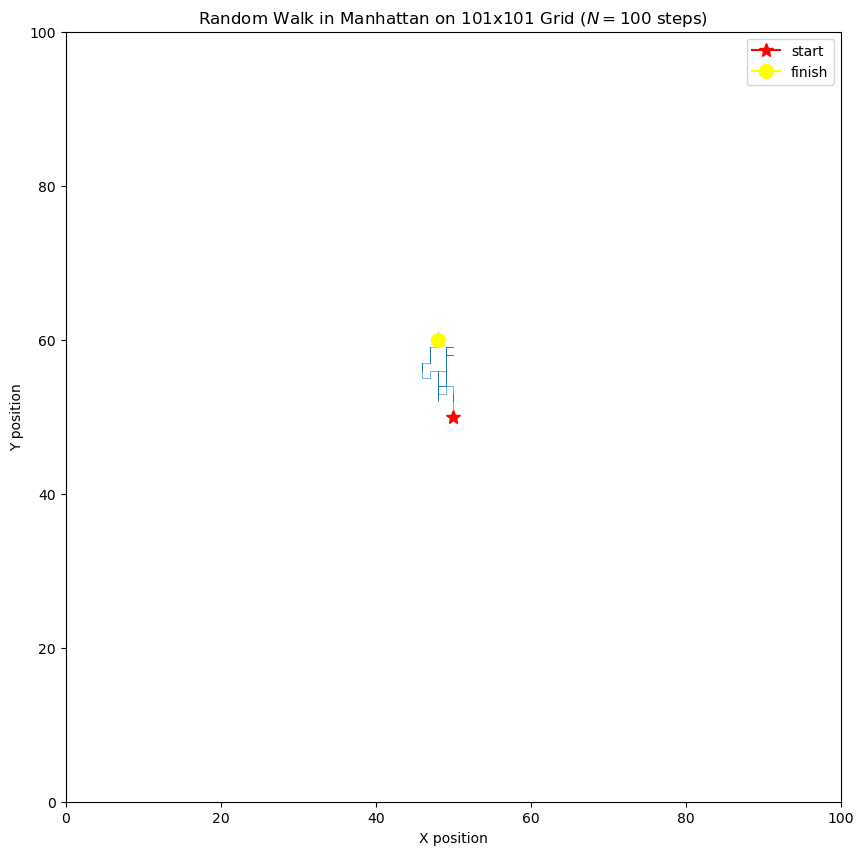

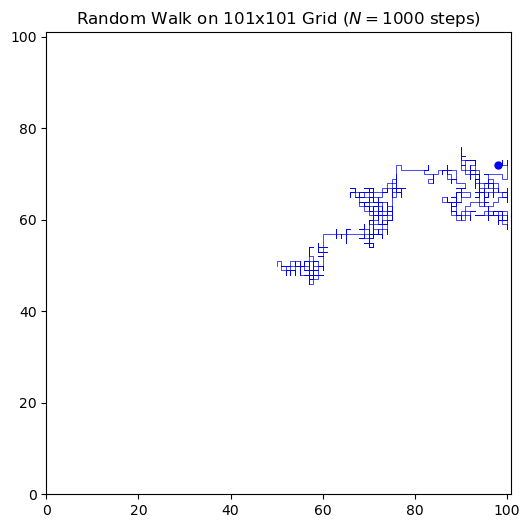

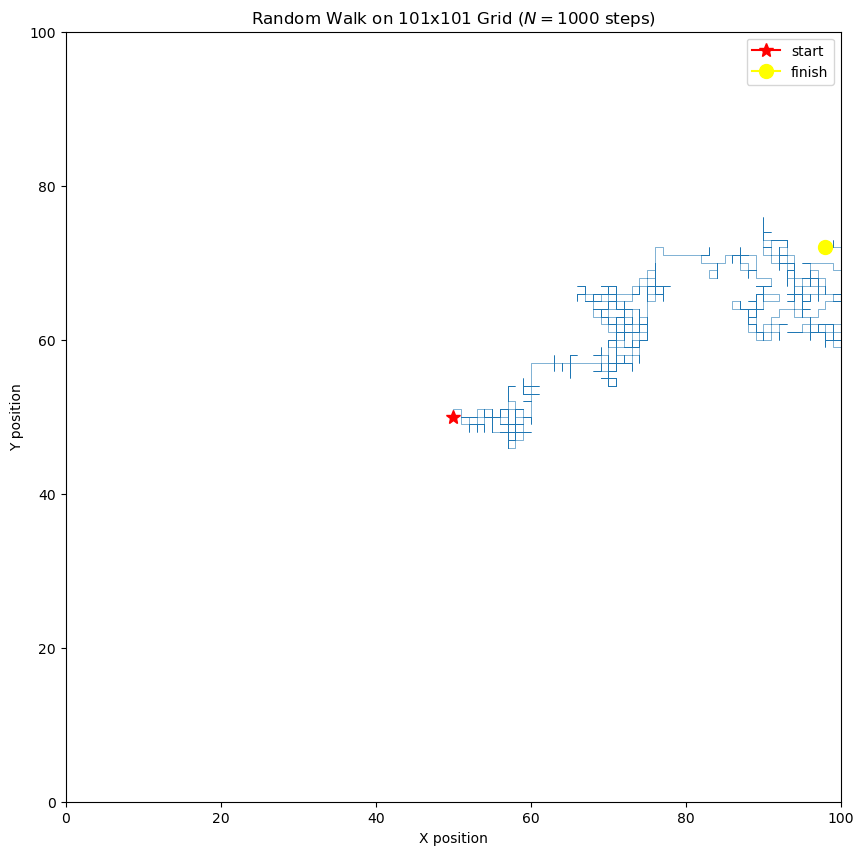

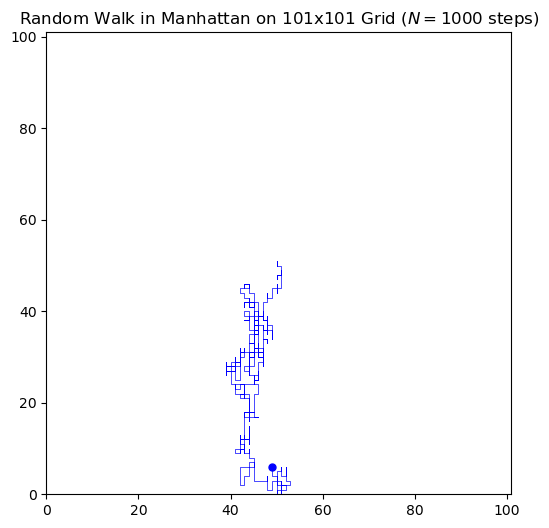

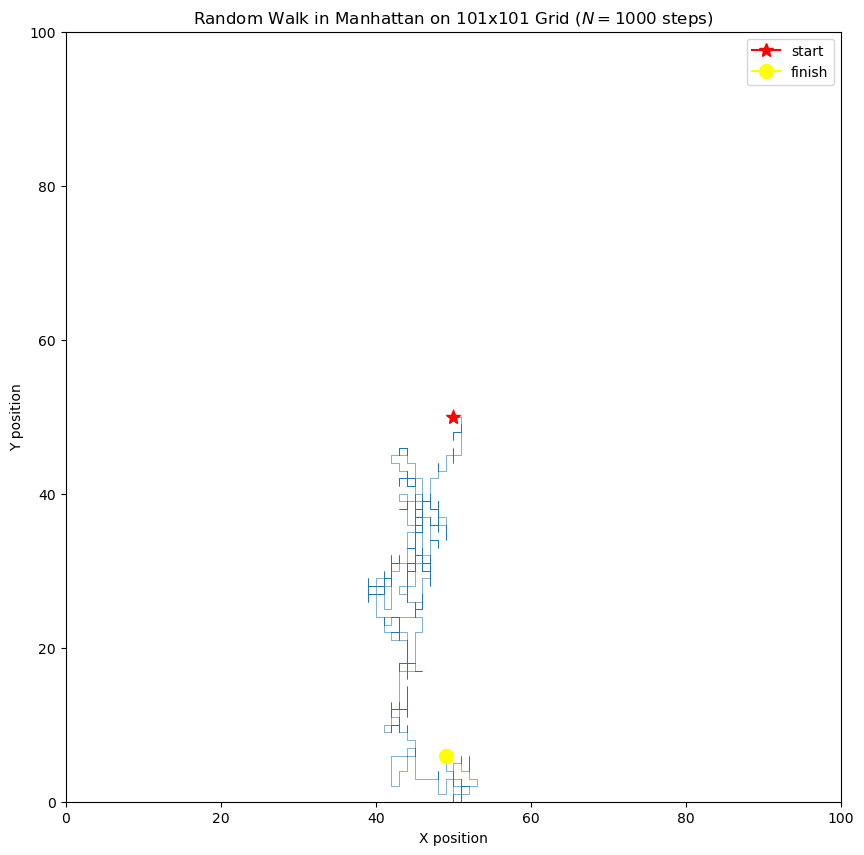

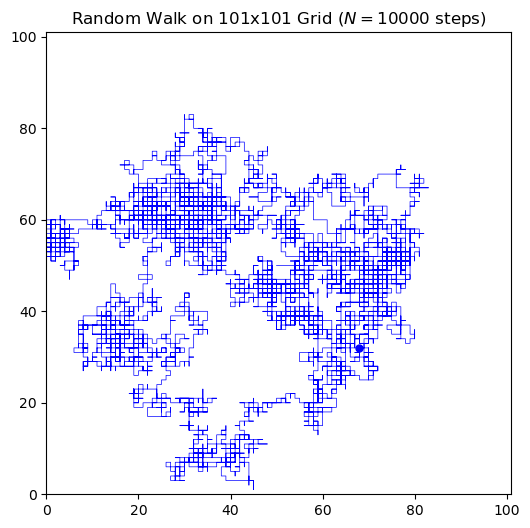

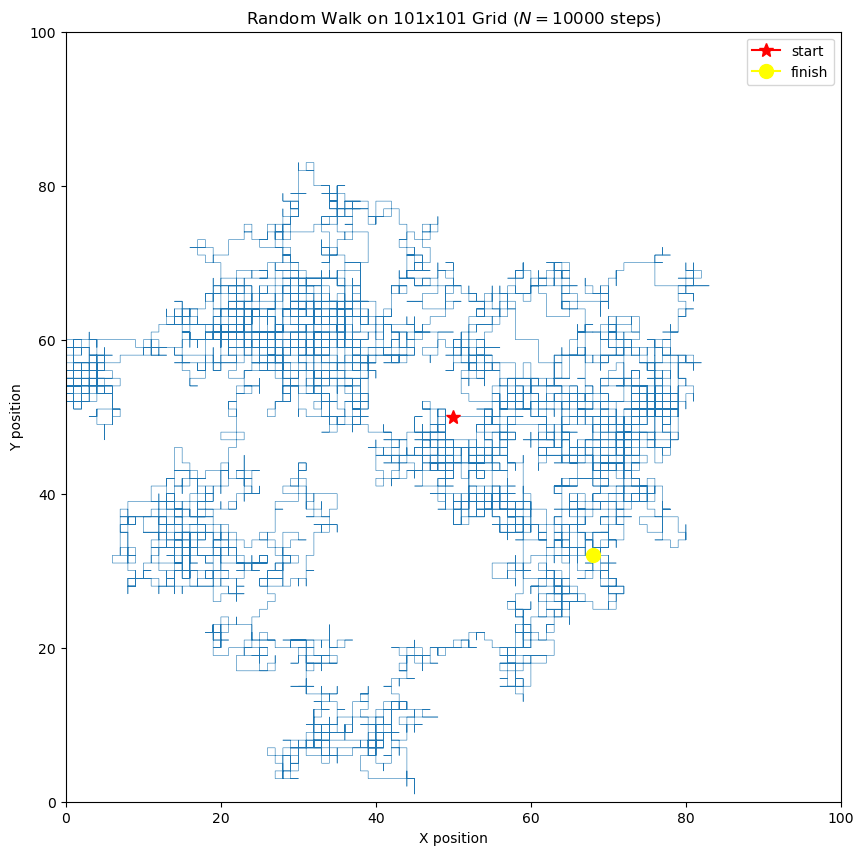


KeyboardInterrupt



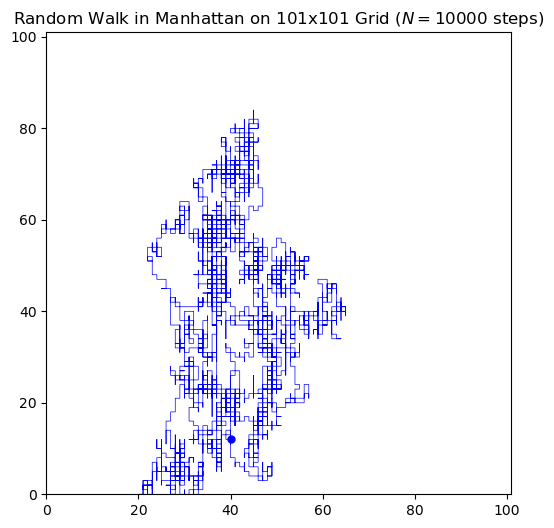

In [4]:
results = run_experiments(N_values=[100, 1000, 10000, 100000])
# Display DataFrame without index in a Jupyter Notebook
HTML(results.to_html(index=False))